<a href="https://colab.research.google.com/github/Chaitanya007-Con/Experiments/blob/main/INFO_7390_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Data Science - Final Project

#### CLAAT Document Link: https://codelabs-preview.appspot.com/?file_id=1y3DyfnK38GvWAwgUUcLO0DleSc_JTuMWpusolLS-Snc#0

#### Objective:
The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

#### Data: 
http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#
 
<b>Portuguese Bank Marketing Data</b> - The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to assess if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

#### Steps:
1. Install required libraries
2. Import Required Modules
3. Data Input
4. Exploratory Data Analysis
5. Model Implementation
6. Scaling - Understood the model accuracy change with multiple types of scaling. Types of scaling performed are: 
7. Model Comparison
8. Confusion Matrix

#### Team members: 
- Nidhi Goyal 
- Chaitanya Nakhare 
- Utkarsh Kakkar 
- Aaradhy Sharma

## I. Install required libraries

In [ ]:
!pip install pandas
!pip install numpy
!pip install sklearn
!pip install seaborn
!pip install xgboost
!pip install pycaret

## II. Import required modules

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay
from pandas_profiling import ProfileReport
from pycaret.classification import *
from pycaret import classification
import matplotlib.pyplot as plt
import pandas_profiling
import seaborn as sns
import xgboost as xg
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

## III. Data input

In [ ]:
data = pd.read_csv("bank-full.csv",error_bad_lines=False, engine="python",header=0,delimiter=';')
data = data.dropna()
print(data.shape)
print(list(data.columns))
data.head(5)

(45211, 17)
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

## IV. Exploratory Data Analysis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


In [ ]:
# Converting 'no' and 'yes' into 0 and 1 in pandas dataframe

data['default'] = data['default'].map({'yes':1 ,'no':0}) 
data['housing'] = data['housing'].map({'yes':1 ,'no':0}) 
data['loan'] = data['loan'].map({'yes':1 ,'no':0}) 
data['y'] = data['y'].map({'yes':1 ,'no':0})

In [ ]:
# Using pandas_profiling to perform EDA. 
profile = ProfileReport(data,explorative= True)
profile

Summarize dataset:   0%|          | 0/30 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile.to_file("panda.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

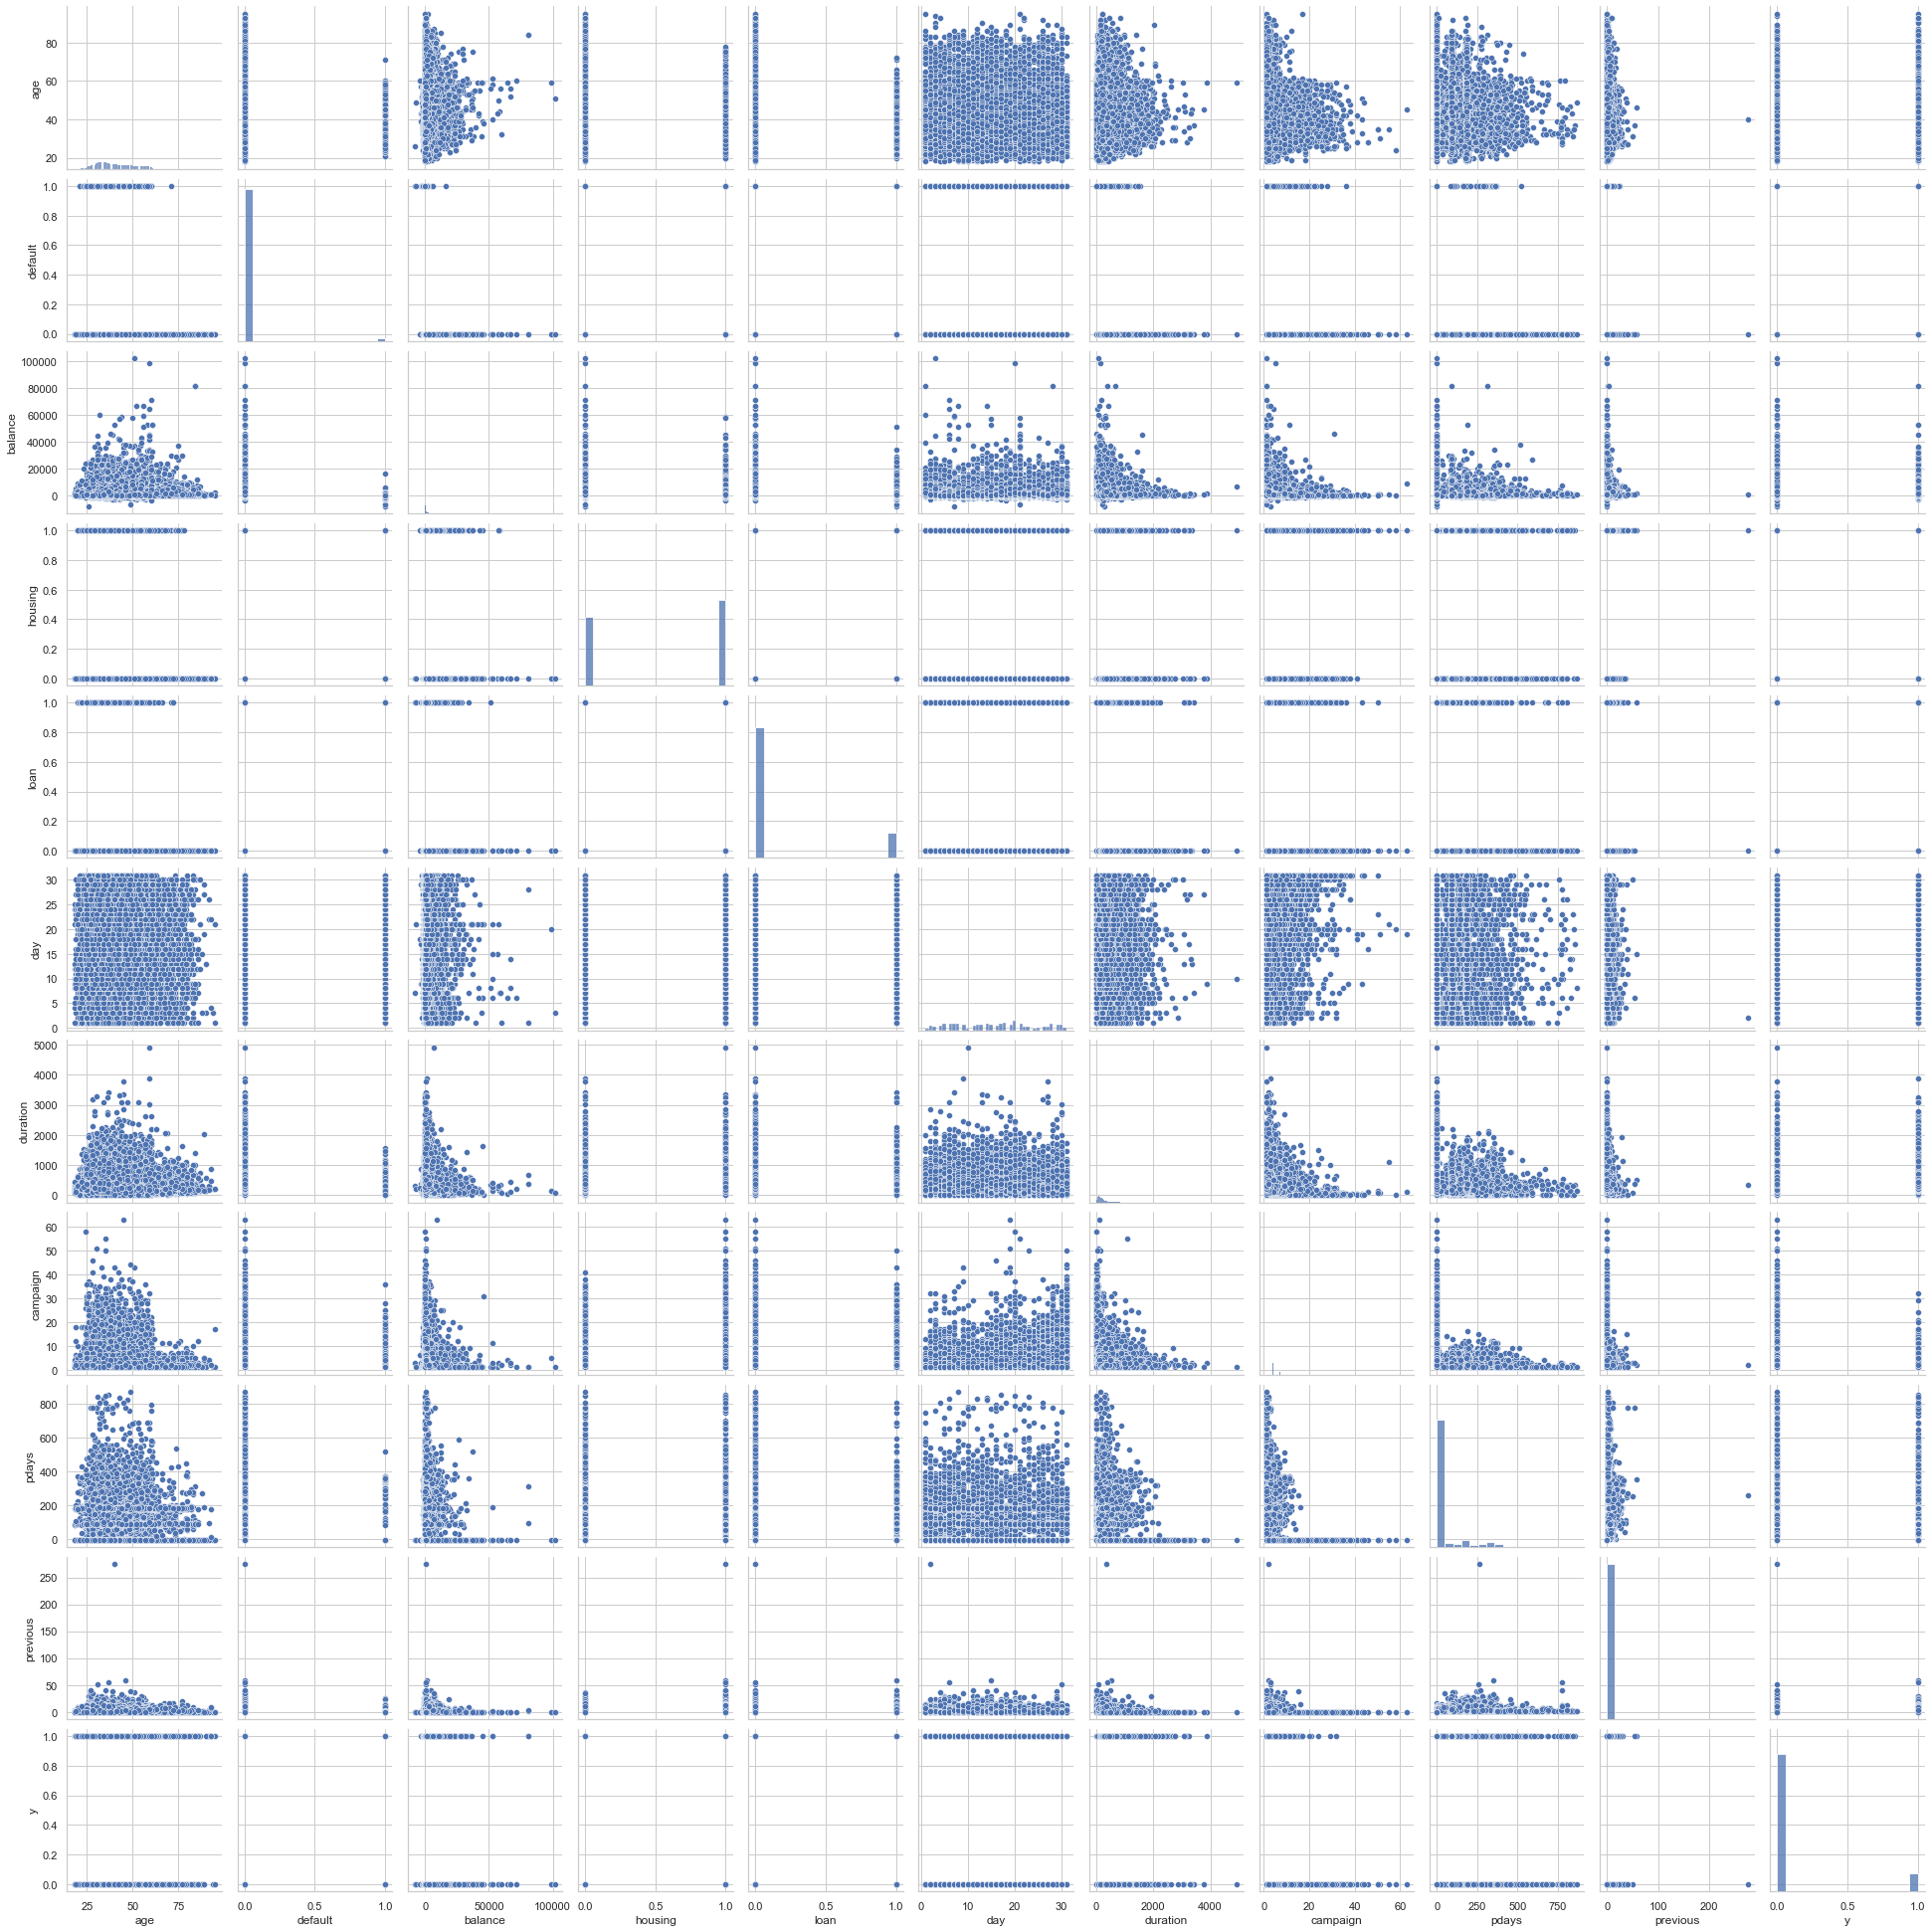

In [ ]:
# Plotting dataset
sns.pairplot(data)

In [ ]:
# See the total count of column y
data['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

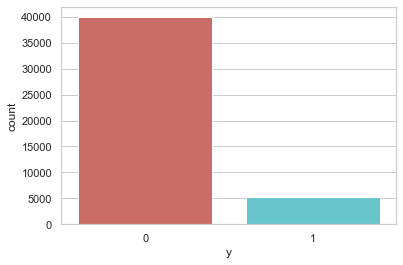

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot the column y
sns.countplot(x='y', data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [ ]:
# See the data by grouping by column y
data.groupby('y').mean()

age   default      balance   housing      loan        day  \
y                                                                    
0  40.838986  0.019112  1303.714969  0.581008  0.169330  15.892290   
1  41.670070  0.009832  1804.267915  0.365854  0.091511  15.158253   

     duration  campaign      pdays  previous  
y                                             
0  221.182806  2.846350  36.421372  0.502154  
1  537.294574  2.141047  68.702968  1.170354

In [ ]:
# Let's check if is there any null values in the dataset
data.isnull()

age    job  marital  education  default  balance  housing   loan  \
0      False  False    False      False    False    False    False  False   
1      False  False    False      False    False    False    False  False   
2      False  False    False      False    False    False    False  False   
3      False  False    False      False    False    False    False  False   
4      False  False    False      False    False    False    False  False   
...      ...    ...      ...        ...      ...      ...      ...    ...   
45206  False  False    False      False    False    False    False  False   
45207  False  False    False      False    False    False    False  False   
45208  False  False    False      False    False    False    False  False   
45209  False  False    False      False    False    False    False  False   
45210  False  False    False      False    False    False    False  False   

       contact    day  month  duration  campaign  pdays  previous  poutcome  \
0        False  False  False     False     False  False     False     False   
1        False  False  False     False     False  False     False     False   
2        False  False  False     False     False  False     False     False   
3        False  False  False     False     False  False     False     False   
4        False  False  False     False     False  False     False     False   
...        ...    ...    ...       ...       ...    ...       ...       ...   
45206    False  False  False     False     False  False     False     False   
45207    False  False  False     False     False  False     False     False   
45208    False  False  False     False     False  False     False     False   
45209    False  False  False     False     False  False     False     False   
45210    False  False  False     False     False  False     False     False   

           y  
0      False  
1      False  
2      False  
3      False  
4      False  
...      ...  
45206  False  
45207  False  
45208  False  
45209  False  
45210  False  

[45211 rows x 17 columns]

In [ ]:
# Let's drop the unnecessary categorical columns
data = data.drop(columns = ['job', 'marital', 'education','contact', 'month', 'poutcome'])
data.head(5)

age  default  balance  housing  loan  day  duration  campaign  pdays  \
0   58        0     2143        1     0    5       261         1     -1   
1   44        0       29        1     0    5       151         1     -1   
2   33        0        2        1     1    5        76         1     -1   
3   47        0     1506        1     0    5        92         1     -1   
4   33        0        1        0     0    5       198         1     -1   

   previous  y  
0         0  0  
1         0  0  
2         0  0  
3         0  0  
4         0  0

## V. Model Implementation

In [ ]:
y = data.y.values
x_data = data.drop(['y'], axis = 1)

In [ ]:
# Defining features for the model
features = [['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration', 'campaign', 'pdays', 'previous']]
accuracies = {}
conf_matrix = {}

1. Logistic Regression

In [ ]:
def logistic_regression(x_train, x_test, y_train, y_test):
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    acc = lr.score(x_test, y_test) * 100

    accuracies['Logistic Regression'] = acc
    conf_matrix['Logistic Regression'] = lr
    print("Logistic Regression Accuracy Score: {:.2f}%".format(acc))

2. K-Nearest Neighbour (KNN) Classification

In [ ]:
def knn(x_train, x_test, y_train, y_test):
    knn = KNeighborsClassifier(n_neighbors = 23)  # n_neighbors means k
    knn.fit(x_train, y_train)
    prediction = knn.predict(x_test)

    acc = knn.score(x_test, y_test) * 100
    accuracies['KNN'] = acc
    conf_matrix['KNN'] = knn
    print("KNN Accuracy Score: {:.2f}%".format(acc))

3. Random Forest Classification

In [ ]:
def random_forest(x_train, x_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators = 500, random_state = 1)
    rf.fit(x_train, y_train)
 
    acc = rf.score(x_test, y_test) * 100
    accuracies['Random Forest'] = acc
    conf_matrix['Random Forest'] = rf
    print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

4. Support Vector Machine (SVM) Classification

In [ ]:
def svm(x_train, x_test, y_train, y_test):
    svm = SVC(random_state = 1)
    svm.fit(x_train, y_train)
 
    acc = svm.score(x_test, y_test) * 100
    accuracies['SVM'] = acc
    conf_matrix['SVM'] = svm
    print("SVM Algorithm Accuracy Score : {:.2f}%".format(acc))

5. Decision Tree Classification

In [ ]:
def decision_tree(x_train, x_test, y_train, y_test):
    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(x_train, y_train)
 
    acc = dt.score(x_test, y_test) * 100
    accuracies['Decision Tree'] = acc
    conf_matrix['Decision Tree'] = dt
    print("Decision Tree Algorithm Accuracy Score : {:.2f}%".format(acc))

6. Neural Network MLP Classification

In [ ]:
def neural_network(x_train, x_test, y_train, y_test):
    clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='sgd', random_state=69,tol=0.000000001)
    clf.fit(x_train, y_train)
 
    acc = clf.score(x_test, y_test) * 100
    accuracies['Neural Network'] = acc
    conf_matrix['Neural Network'] = clf
    print("Neural Network Algorithm Accuracy Score : {:.2f}%".format(acc))

Models Accuracy without scaling

In [ ]:
# Without scaling
x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size = 0.2, random_state = 0)

logistic_regression(x_train, x_test, y_train, y_test)
knn(x_train, x_test, y_train, y_test)
random_forest(x_train, x_test, y_train, y_test)
svm(x_train, x_test, y_train, y_test)
decision_tree(x_train, x_test, y_train, y_test)
neural_network(x_train, x_test, y_train, y_test)

Logistic Regression Accuracy Score: 88.70%
KNN Accuracy Score: 88.38%
Random Forest Algorithm Accuracy Score : 89.68%
SVM Algorithm Accuracy Score : 88.25%
Decision Tree Algorithm Accuracy Score : 85.83%
Neural Network Algorithm Accuracy Score : 88.23%


## VI. Scaling

1. Standard Scaling
2. Robust Scaling
3. Min-Max Scaling

In [ ]:
# 1. Standard Scaling
scaler = StandardScaler()
x_scaled = x_data.copy()
for feature in features:
    x_scaled[feature] = scaler.fit_transform(x_data[feature])
    
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 0)

Models Accuracy with Standard scaling

In [ ]:
logistic_regression(x_train, x_test, y_train, y_test)
knn(x_train, x_test, y_train, y_test)
random_forest(x_train, x_test, y_train, y_test)
svm(x_train, x_test, y_train, y_test)
decision_tree(x_train, x_test, y_train, y_test)
neural_network(x_train, x_test, y_train, y_test)

Logistic Regression Accuracy Score: 88.84%
KNN Accuracy Score: 89.09%
Random Forest Algorithm Accuracy Score : 89.61%
SVM Algorithm Accuracy Score : 89.10%
Decision Tree Algorithm Accuracy Score : 85.81%
Neural Network Algorithm Accuracy Score : 89.21%


In [ ]:
# 2.Robust Scaling
scaler = RobustScaler()
x_scaled = x_data.copy()
for feature in features:
    x_scaled[feature] = scaler.fit_transform(x_data[feature])
    
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 0)

Models Accuracy with Robust scaling

In [ ]:
logistic_regression(x_train, x_test, y_train, y_test)
knn(x_train, x_test, y_train, y_test)
random_forest(x_train, x_test, y_train, y_test)
svm(x_train, x_test, y_train, y_test)
decision_tree(x_train, x_test, y_train, y_test)
neural_network(x_train, x_test, y_train, y_test)

Logistic Regression Accuracy Score: 88.83%
KNN Accuracy Score: 88.93%
Random Forest Algorithm Accuracy Score : 89.67%
SVM Algorithm Accuracy Score : 88.25%
Decision Tree Algorithm Accuracy Score : 85.81%
Neural Network Algorithm Accuracy Score : 88.76%


In [ ]:
# 3. Min-Max Scaling
scaler = MinMaxScaler()
x_scaled = x_data.copy()
for feature in features:
    x_scaled[feature] = scaler.fit_transform(x_data[feature])

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 0)

Models Accuracy with Min-Max scaling

In [ ]:
logistic_regression(x_train, x_test, y_train, y_test)
knn(x_train, x_test, y_train, y_test)
random_forest(x_train, x_test, y_train, y_test)
svm(x_train, x_test, y_train, y_test)
decision_tree(x_train, x_test, y_train, y_test)
neural_network(x_train, x_test, y_train, y_test)

Logistic Regression Accuracy Score: 88.81%
KNN Accuracy Score: 89.25%
Random Forest Algorithm Accuracy Score : 89.67%
SVM Algorithm Accuracy Score : 88.33%
Decision Tree Algorithm Accuracy Score : 85.86%
Neural Network Algorithm Accuracy Score : 88.71%


## VII. Model Comparison

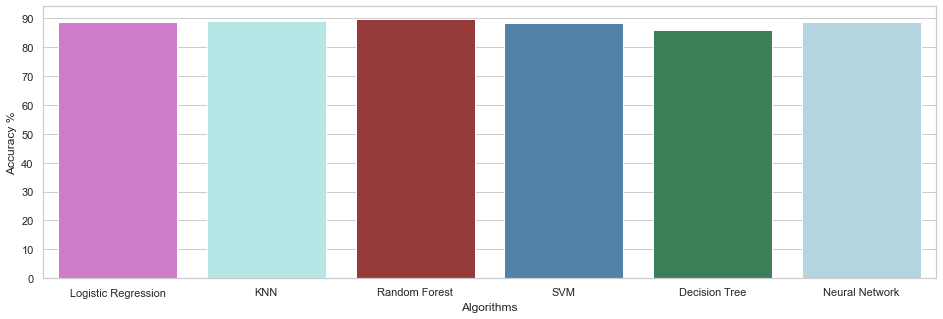

In [ ]:
colors = ["Orchid", "Paleturquoise", "brown", "Steelblue", "Seagreen", "Lightblue"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

## VIII. Confusion Matrix

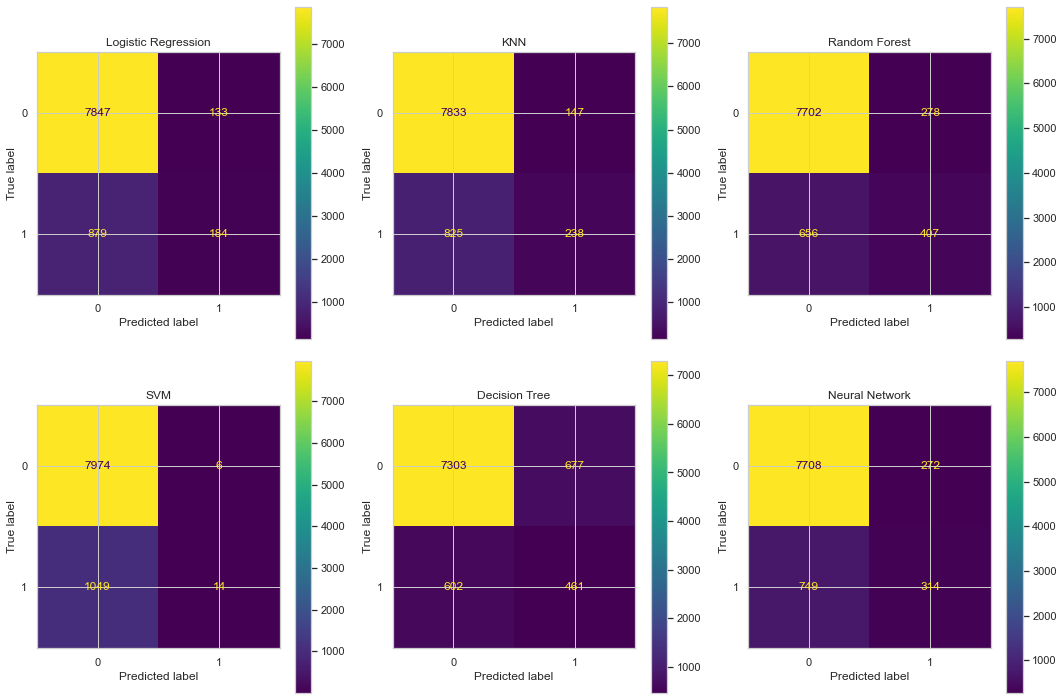

In [ ]:
f, axes = plt.subplots(2, 3, figsize=(15, 10))

for name, cls, ax in zip(conf_matrix.keys(), conf_matrix.values(), axes.flatten()):
    disp = plot_confusion_matrix(cls, x_test, y_test, ax=ax)
    ax.title.set_text(name)

plt.tight_layout()
plt.show()

## IX. Model Performance comparison with PyCaret

In [ ]:
# Set up the environment
classification_setup = classification.setup(data = data, target='y')

In [ ]:
# Compare performance of different classification models
classification.compare_models()

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=4041, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
# compare specific models
best_specific = classification.compare_models(include = ['lr','knn', 'rf','svm','dt', 'xgboost'])

In [ ]:
# build the Random Forest model with pycaret
rf = create_model('rf')

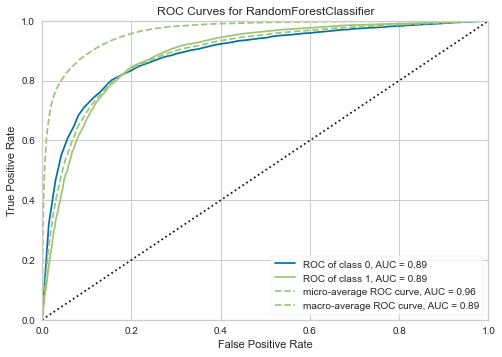

In [ ]:
# plotting a model
plot_model(rf)

## X. Inference

We achieved following observations after having data analyzed and visualized: 
 
1. Education: Most people have university level education while illiterate people are very less. 
2.  <b>Random Forest classification</b> model has a high accuracy for the above dataset thus it would be apt to understand bank analysis.
3. For our case, <b>Fall-out or FPR</b> and <b>specificity</b> would be an important metric to choose a model as these will tell us how many customers  did not actually subscribe for a term but the model predicted and labeled them as subscribed which would slash down banks business/revenue for that term.
4. <b>"Lower" specificity and fall-out</b> is ideal for this USE case. Hence, we choose the model that has better/higher accuracy score which is quintessential for a successful classification model given that it has a lower specificity and fall-out score.
5. Thus, our goal here would be chooseing a model with minimum Fall-out, specificity and then implement it as our business model/USE case.
6. We can confidently say that having a high metric say accuracy doesn't necessarily imply a perfect business model. For the bank <b>XGBoost and Random Forest</b> would be a good way of classifying the customers.


## XI. Citations

1. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
2. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
3. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
4. https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
5. https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
6. https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier
7. https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
8. https://seaborn.pydata.org/generated/seaborn.barplot.html
9. https://github.com/pycaret/pycaret
10. https://pycaret.org/compare-models/